# Sentiment Analysis on Twitter Data

**Objective:**
In this project, we develop a sentiment analysis model to classify text data into Positive, Neutral, or Negative categories. This involves Natural Language Processing (NLP) and machine learning algorithms like Naive Bayes or Logistic Regression.


In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style="whitegrid")


The dataset contains Twitter text and sentiment labels.
The sentiment column represents negative, neutral, and positive opinions.


In [33]:
df = pd.read_csv("Twitter_Data.csv") #Before this i was download locally and I have given Local path Saying this for no confusion  
df.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [20]:
df.columns


Index(['clean_text', 'category'], dtype='object')

Missing values were removed to ensure clean and reliable input for the model.


In [21]:
df.rename(columns={
    'clean_text': 'text',
    'category': 'sentiment'
}, inplace=True)


In [22]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


In [23]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"\@\w+|\#", "", text)
    return text

df['clean_text'] = df['text'].apply(clean_text)


In [24]:
df = df[df['clean_text'].str.strip() != ""]
df.reset_index(drop=True, inplace=True)

(df['clean_text'].str.strip() == "").sum()


0

In [25]:
vectorizer = CountVectorizer(max_features=5000)

X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [28]:
y_pred = model.predict(X_test)


In [29]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8082162361170767

In [30]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        -1.0       0.70      0.74      0.72      7023
         0.0       0.89      0.79      0.84     10978
         1.0       0.81      0.86      0.83     14593

    accuracy                           0.81     32594
   macro avg       0.80      0.79      0.80     32594
weighted avg       0.81      0.81      0.81     32594



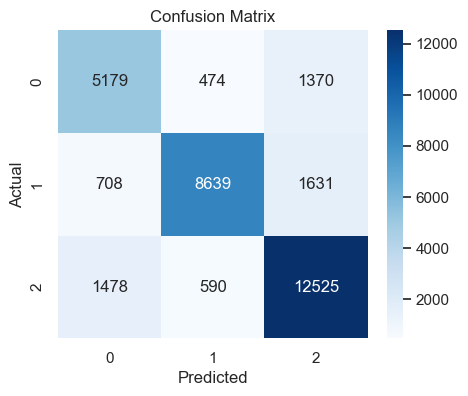

In [31]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


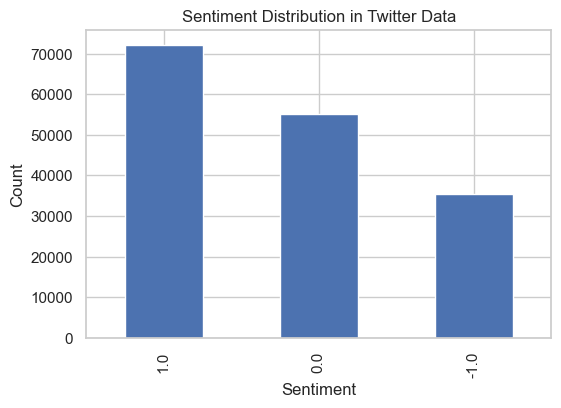

In [32]:
plt.figure(figsize=(6,4))
df['sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution in Twitter Data")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


## Conclusion

In this project, a sentiment analysis model was developed using Twitter data.
Natural Language Processing techniques and a Naive Bayes classifier were used
to classify tweets into positive, negative, and neutral sentiments.

This project provided hands-on experience with text preprocessing,
feature extraction, machine learning, and data visualization.
